In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
tweets=pd.read_csv('/content/tweet_emotions.csv')

In [3]:
tweets.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


#### Data Insights

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [5]:
tweets['tweet_id'].nunique()

40000

In [6]:
tweets['sentiment'].nunique()

13

In [7]:
tweets['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [8]:
df=tweets.drop('tweet_id',axis=1)#as it is distinct values, no use to us

In [9]:
df.head(3)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...


In [10]:
df[df['sentiment']=='surprise'].head(7)

,sentiment,content
14,surprise,Got the news
164,surprise,"2 days of this month left, and I only have 400..."
189,surprise,@Bern_morley where are you? In Bris? I can't h...
190,surprise,bec vs fat food --- winner = fat food but n...
192,surprise,I had a dream about a pretty pretty beach and ...
194,surprise,when da heck will the garage man get here I as...
223,surprise,Why am I completing facebook quizzes at this t...


In [11]:
df[df['sentiment']=='neutral'].head(7)

,sentiment,content
4,neutral,@dannycastillo We want to trade with someone w...
10,neutral,cant fall asleep
22,neutral,No Topic Maps talks at the Balisage Markup Con...
31,neutral,@cynthia_123 i cant sleep
32,neutral,I missed the bl***y bus!!!!!!!!
33,neutral,feels strong contractions but wants to go out....
34,neutral,SoCal! stoked. or maybe not.. tomorrow


#### Data Preprocessing

In [12]:
# downloading and importing required libraries
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
word_lem=WordNetLemmatizer()
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [14]:
# creating a function to lemmatize
def lemm(text):
  lemm_text=[word_lem.lemmatize(word) for word in text]
  return lemm_text

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")# model for english which can help tokenization etc.

In [16]:
# defining a function for preprocess each tweets and transform it to a bunch of words

def cor_proces(content):
  cleaned_con = re.sub(r'@\w+', '', content)# to remove the user name from tweets
  non_pun=re.sub('[^a-zA-Z0-1]',' ',cleaned_con)# to replace non-alphanumeric characters with spaces
  doc = nlp(non_pun)

  # Lowercase, tokenize, remove stopwords, and lemmatize
  tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
  lower_tokens = [token.lower() for token in tokens]

  # Initialize lemmatizer
  word_lem = WordNetLemmatizer()
  lemm_con = [word_lem.lemmatize(token) for token in lower_tokens if token not in stopwords]

  # Join tokens to form the processed text
  new_con = ' '.join(lemm_con )

  return new_con


  return new_con

In [17]:
# testing the function
test_con=df['content'][39]
test_con

'@GABBYiSACTiVE Aw you would not unfollow me would you? Then I would cry'

In [18]:
cor_proces(test_con)

'aw unfollow cry'

In [19]:
test_con=df['content'][564]
test_con

'thank you @ddlovato (: cant wait!!!! ummm btw ima crash still sick'

In [20]:
cor_proces(test_con)

'thank nt wait ummm btw m crash sick'

In [ ]:
# applying the function to the data
df['new_content']=df['content'].apply(cor_proces)

In [ ]:
df.head()

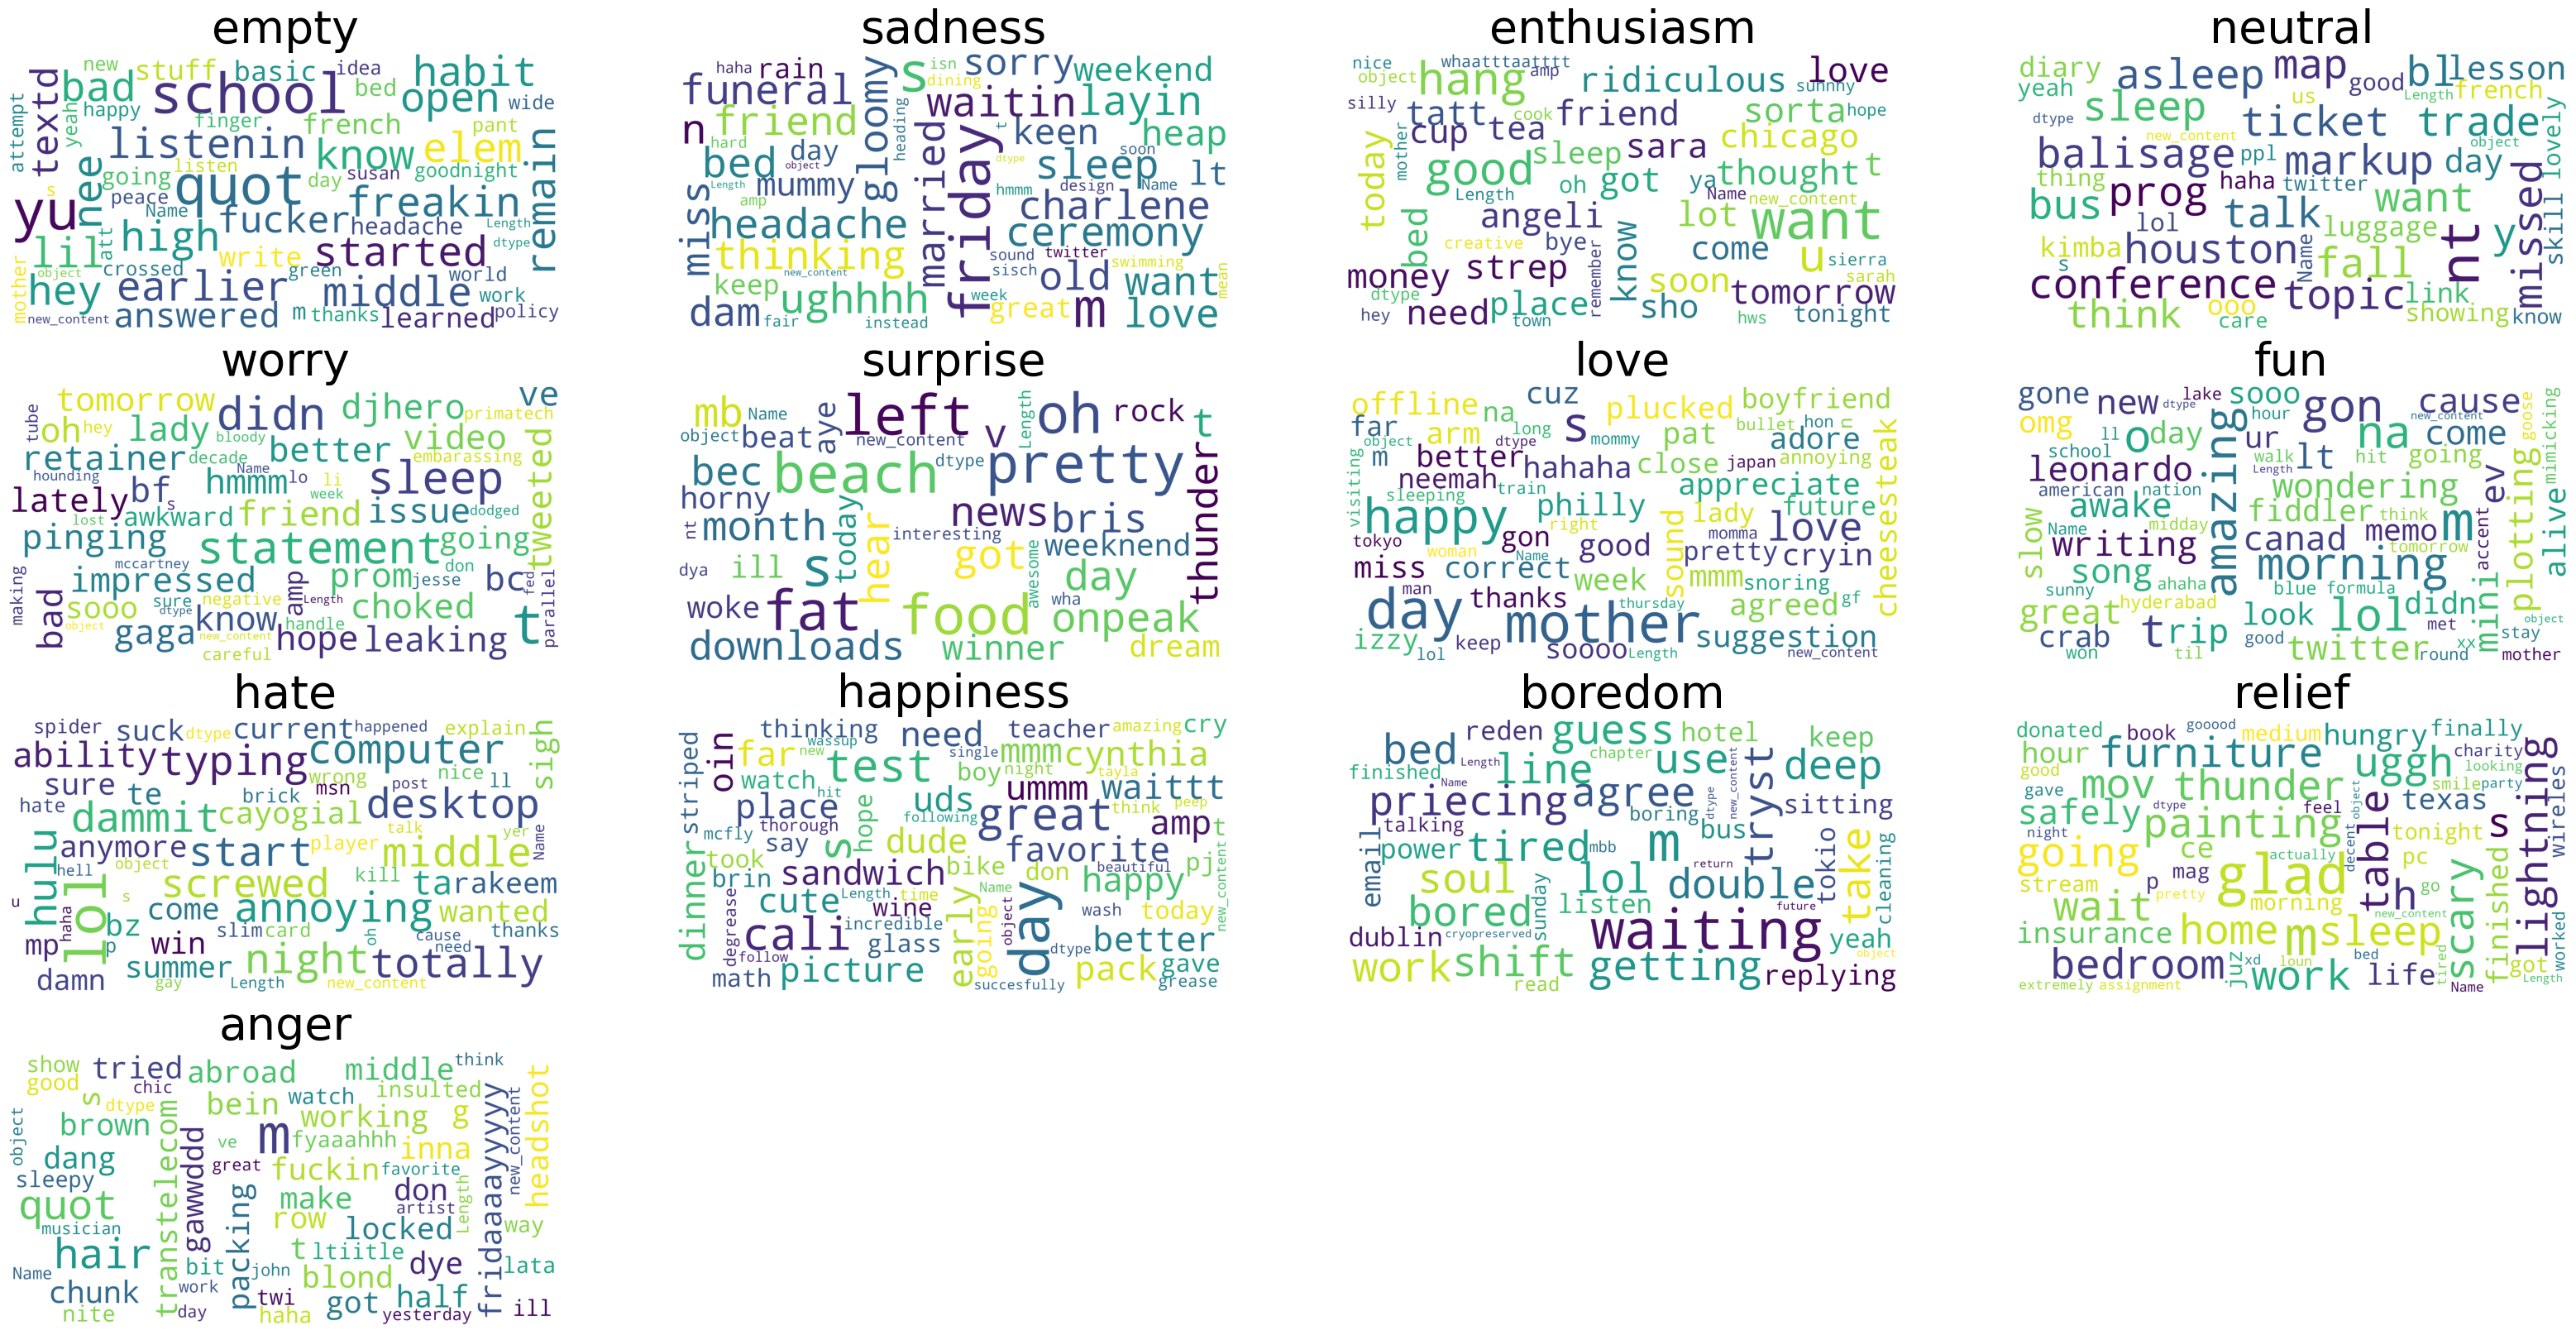

<Figure size 640x480 with 0 Axes>

In [25]:
# plotting a word cloud to understand and get trend of each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(4,4, index+1)
    # print(col)
    df2 = df[df['sentiment']==col]
    data = df2['new_content']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()



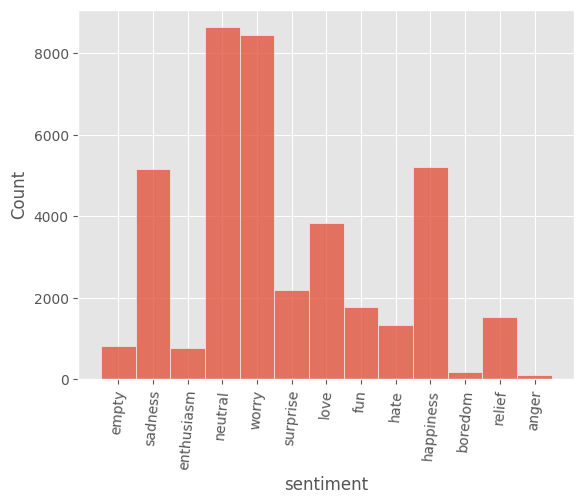

In [26]:
ax=sns.histplot(data=df['sentiment'])
plt.xticks(rotation=85)
plt.show()

In [27]:
# classifing sentiments to joy, sadness, anger, neutral, or surprise.
sentiment_mapping = {
    'neutral': 'neutral',
    'worry': 'sadness',
    'happiness': 'joy',
    'sadness': 'sadness',
    'love': 'joy',
    'surprise': 'surprise',
    'fun': 'joy',
    'relief': 'joy',
    'hate': 'anger',
    'empty': 'sadness',
    'enthusiasm': 'joy',
    'boredom': 'sadness',
    'anger': 'anger'
}

df['label'] = df['sentiment'].map(sentiment_mapping)

In [28]:
df.head(3)

,sentiment,content,new_content,label
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freakin,sadness
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin,sadness
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,sadness


In [29]:
df=df.drop(['sentiment','content'],axis=1)

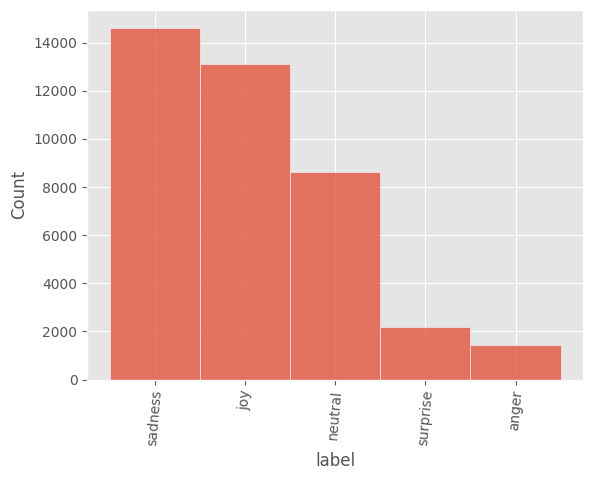

In [30]:
ax=sns.histplot(data=df['label'])
plt.xticks(rotation=85)
plt.show()

need a balancing of numbers of each sentiment. defining a function to generate data to balance sentiments which is downfall in graph

In [31]:
# this will help to find positiveness and negativeness of each tweet
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [33]:
df.iloc[56]

new_content    bed sorta today good sara strep thought angeli...
label                                                        joy
Name: 56, dtype: object

In [34]:
sia.polarity_scores(df.iloc[56]['new_content'])

{'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.6151}

In [35]:
df.iloc[223]

new_content    completing facebook quiz time morning especial...
label                                                   surprise
Name: 223, dtype: object

In [36]:
sia.polarity_scores(df.iloc[223]['new_content'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [37]:
A=df['new_content'].loc[df['label']=="anger"]
B=df['new_content'].loc[df['label']=="surprise"]

In [38]:
import random
Z =df['new_content'].loc[df['label']=="sadness"]

tokenized_words = [word for sentence in Z for word in sentence.split()]

min_words = 6
max_words = max(len(sentence.split()) for sentence in Z)

# Function to generate a new sentence with a random number of words
def generate_new_sentence(tokenized_words, min_words, max_words, threshold):
    while True:
        num_words = random.randint(min_words, max_words)
        selected_words = random.sample(tokenized_words, num_words)
        new_sentence = ' '.join(selected_words)
        polarity_score = sia.polarity_scores(new_sentence)['compound']
        pos_score = sia.polarity_scores(new_sentence)['pos']
        if polarity_score < threshold and pos_score == 0:
            return new_sentence




In [39]:
# data Augmentation of anger label
new_sentences = [generate_new_sentence(tokenized_words, min_words, max_words,0.1) for _ in range(6000-len(A))]


In [40]:
len(new_sentences)

4567

In [41]:
balanced_data = {'new_content': [], 'label': []}

for item in new_sentences:
    balanced_data['new_content'].append(item)
    balanced_data['label'].append("anger")

balanced_df = pd.DataFrame(balanced_data)

balanced_df.head(4)

,new_content,label
0,intake got phone nt omg loafing stuck mom sad ...,anger
1,x t day son t level line going sorry postin wa...,anger
2,m oth complaint wee u starfire experience earl...,anger
3,gasp left ocd man facebook quot l long bad top...,anger


In [42]:
concated_df=pd.concat([df,balanced_df],ignore_index=True)

In [43]:
# function to augment surprise data
def generate_new_sentence(tokenized_words, min_words, max_words, threshold):
    while True:
        num_words = random.randint(min_words, max_words)
        selected_words = random.sample(tokenized_words, num_words)
        new_sentence = ' '.join(selected_words)
        polarity_score = sia.polarity_scores(new_sentence)['compound']
        neg_score = sia.polarity_scores(new_sentence)['neg']
        if polarity_score > threshold and neg_score == 0:
            return new_sentence

In [44]:
new_sentences = [generate_new_sentence(tokenized_words, min_words, max_words,0) for _ in range(6000-len(B))]


In [45]:
balanced_data = {'new_content': [], 'label': []}

for item in new_sentences:
    balanced_data['new_content'].append(item)
    balanced_data['label'].append('surprise')

balanced_df = pd.DataFrame(balanced_data)

balanced_df.head(4)

,new_content,label
0,heart friday work aunt sister neomonia aww hea...,surprise
1,won summer peep morning leaving legal dying ph...,surprise
2,home hot character desk socialily got day ness...,surprise
3,rolando judge locked terminator got daisy ly h...,surprise


In [46]:
concated_df=pd.concat([concated_df,balanced_df],ignore_index=True)

In [47]:
concated_df['label'].value_counts()

label
sadness     14630
joy         13112
neutral      8638
surprise     6000
anger        6000
Name: count, dtype: int64

droping the raws where a minimum word count is not stisfied

In [48]:

def count(text):
    return len(text.split())

concated_df['word_count'] = concated_df['new_content'].apply(count)

concated_df = concated_df[~((concated_df['word_count'] < 5) & concated_df['label'].isin(['joy', 'sadness']))]
concated_df.drop(columns=['word_count'], inplace=True)

In [49]:
concated_df['label'].value_counts()

label
sadness     10240
joy          9424
neutral      8638
surprise     6000
anger        6000
Name: count, dtype: int64

In [50]:
df_shuffled = concated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [51]:
df_shuffled

,new_content,label
0,ooh icecream s gone oh wait got box freezor yumm,sadness
1,bust flash great t year prevent fact lick,surprise
2,didn t work,neutral
3,lol don t know nt need plant ll hug instead hug,joy
4,wasn singer morning junior ok sleep want tuesd...,surprise
...,...,...
40297,need hug got ta find place live new job,sadness
40298,m going bed dnt feel,sadness
40299,genuinely industry drink twitter chicken exper...,surprise
40300,spoke keith urban s record company t till holi...,sadness


In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [53]:
X=df_shuffled['new_content']
y=df_shuffled['label']

In [54]:
y = label_encoder.fit_transform(y)

In [55]:
y

array([3, 4, 2, ..., 4, 3, 3])

In [56]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Training the Model

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [58]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [57]:
ML_model=RandomForestClassifier(n_estimators=100, n_jobs=-1)
ML_model.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1)

In [59]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report

predictions = ML_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.47760823719141543


In [60]:
print("Classification Report: \n", classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.29      0.40      1230
           1       0.51      0.56      0.53      1858
           2       0.47      0.66      0.55      1819
           3       0.40      0.53      0.46      1964
           4       0.62      0.18      0.28      1190

    accuracy                           0.48      8061
   macro avg       0.53      0.44      0.44      8061
weighted avg       0.51      0.48      0.46      8061



#### Deep Learning Model

In [59]:
X_train.shape[1]

24018

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [61]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # output layer with softmax for multi-class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # use sparse categorical crossentropy
              metrics=['accuracy'])

due to over usage of ram colab disconnected the sesson multiple times, futher steps couldnt compleated

In [62]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.1)


In [ ]:
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f'Test accuracy: {accuracy}')